<a href="https://colab.research.google.com/github/Abhit2763/prodigy1/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
import string
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
training_data = pd.read_csv('/content/twitter_training.csv', header=None)
validation_data = pd.read_csv('/content/twitter_validation.csv', header=None)

In [ ]:
training_data

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
46290,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...
46291,11944,Verizon,Neutral,The last 3 August's I've broken my phone. This...
46292,11944,Verizon,Neutral,The last time I broke my phone was on August 3...
46293,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...


In [ ]:
validation_data

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
training_data.columns = ['id','game','sentiment','text']
validation_data.columns = ['id','game','sentiment','text']

In [ ]:
training_data


,id,game,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
46290,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...
46291,11944,Verizon,Neutral,The last 3 August's I've broken my phone. This...
46292,11944,Verizon,Neutral,The last time I broke my phone was on August 3...
46293,11944,Verizon,Neutral,The last 3 August’s I have broken my phone. Th...


In [ ]:
validation_data

,id,game,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
training_data.shape


(46295, 4)

In [ ]:
validation_data.shape

(1000, 4)

In [ ]:
training_data.describe(include='all')

,id,game,sentiment,text
count,46295.000000,46295,46295,45850
unique,NaN,20,4,42998
top,NaN,Microsoft,Positive,It is not the first time that the EU Commissio...
freq,NaN,2400,13710,109
mean,6093.146042,NaN,NaN,NaN
std,4090.867555,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,1986.500000,NaN,NaN,NaN
50%,5590.000000,NaN,NaN,NaN
75%,9558.000000,NaN,NaN,NaN


In [ ]:
id_types = training_data['id'].value_counts()
id_types

id
2401     6
7343     6
7311     6
7310     6
7309     6
        ..
3036     6
3035     6
3034     6
3033     6
11944    5
Name: count, Length: 7716, dtype: int64

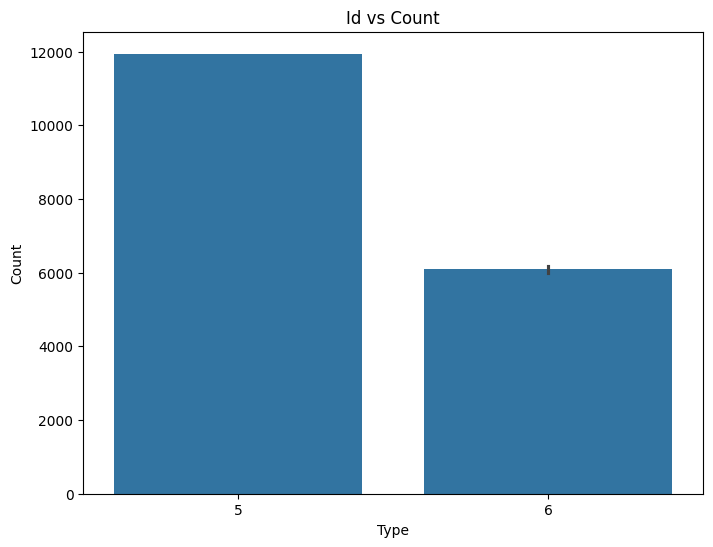

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Id vs Count')
plt.show()

In [ ]:
game_types = training_data['game'].value_counts()
game_types

game
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Dota2                                2364
WorldOfCraft                         2364
NBA2K                                2352
Battlefield                          2346
Overwatch                            2334
Xbox(Xseries)                        2334
Amazon                               2316
PlayStation5(PS5)                    2310
CS-GO                                2304
Google                               2298
Hearthstone                          2298
Borderlands                          2286
Fortnite                             2274
PlayerUnknownsBattlegrounds(PUBG)    2274
AssassinsCreed                       2244
Verizon                              2051
Name: count, dtype: int64

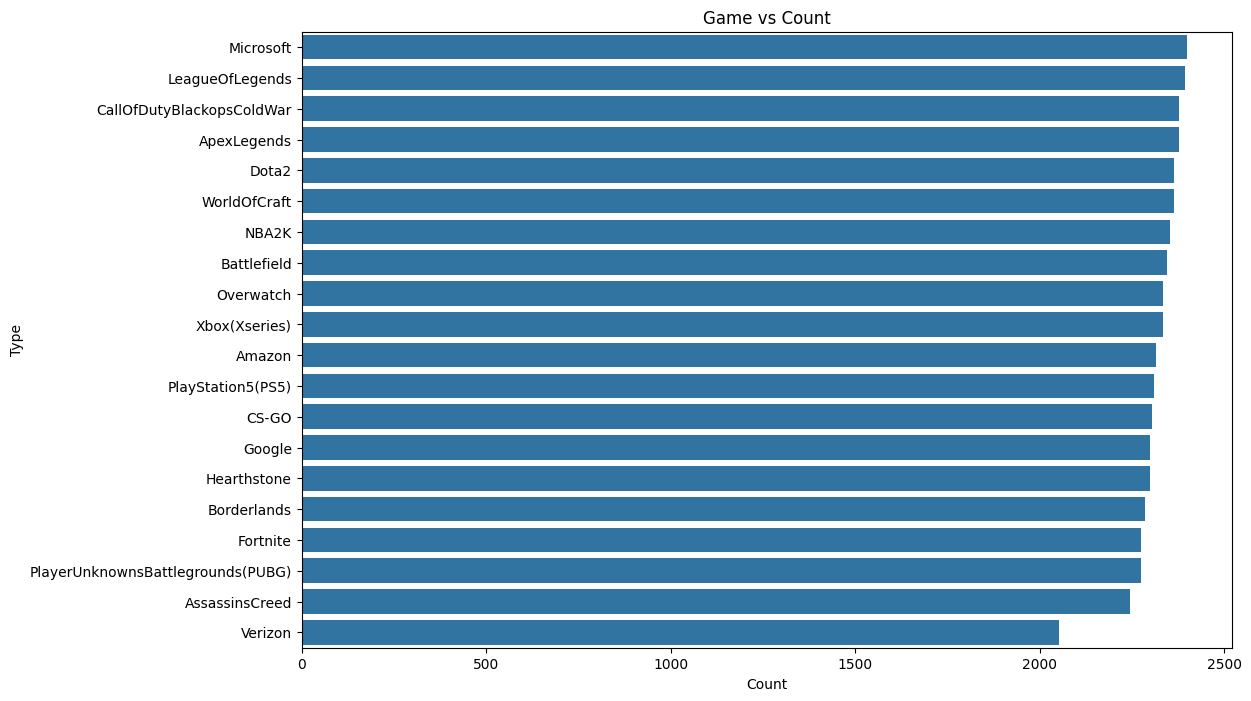

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y=game_types.index, x=game_types.values)
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Game vs Count')
plt.show()

<Axes: >

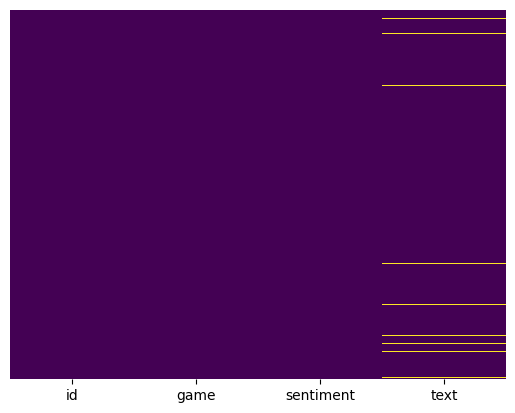

In [ ]:
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
total_null=training_data.isnull().sum().sort_values(ascending=False)
percent_null=(training_data.isnull().sum()/training_data.isnull().count()).sort_values(ascending=False)
print("Total records= ", training_data.shape[0])
missing_data=pd.concat([total_null,percent_null],axis=1,keys=['Total','Percent'])
missing_data.head(20)

Total records=  46295


,Total,Percent
text,445,0.009612
id,0,0.000000
game,0,0.000000
sentiment,0,0.000000


In [ ]:
training_data.dropna(subset=['text'],inplace=True)

total_null=training_data.isnull().sum().sort_values(ascending=False)
percent_null=(training_data.isnull().sum()/training_data.isnull().count()*100).sort_values(ascending=False)
print("Total records= ", training_data.shape[0])
missing_data = pd.concat([total_null,percent_null],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(20)

Total records=  45850


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [ ]:
train0 = training_data[training_data['sentiment'] == 'Negative']
train1 = training_data[training_data['sentiment'] == 'Positive']
train2 = training_data[training_data['sentiment'] == 'Neutral']
train3 = training_data[training_data['sentiment'] == 'Irrelevant']

In [ ]:
train0.shape, train1.shape, train2.shape, train3.shape

((12189, 4), (13610, 4), (11343, 4), (8708, 4))

In [ ]:
training_data = pd.concat([train0, train1, train2, train3], axis=0)
training_data

,id,game,sentiment,text
24,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
27,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
46243,11936,Verizon,Irrelevant,Mike McCaul (R - Clear Channel) is not represe...
46244,11936,Verizon,Irrelevant,Mike McCaul (R-Clear Channel) does not represe...
46245,11936,Verizon,Irrelevant,Mike McCaul (R - Clear Channel) Do not represe...
46246,11936,Verizon,Irrelevant,Republican Mike McCaul ( R - TD Clear Channel ...


In [ ]:
id_types = training_data['id'].value_counts()
id_types

id
2405     6
12524    6
12548    6
12547    6
12545    6
        ..
12834    3
10034    3
12845    3
8103     3
10066    3
Name: count, Length: 7716, dtype: int64

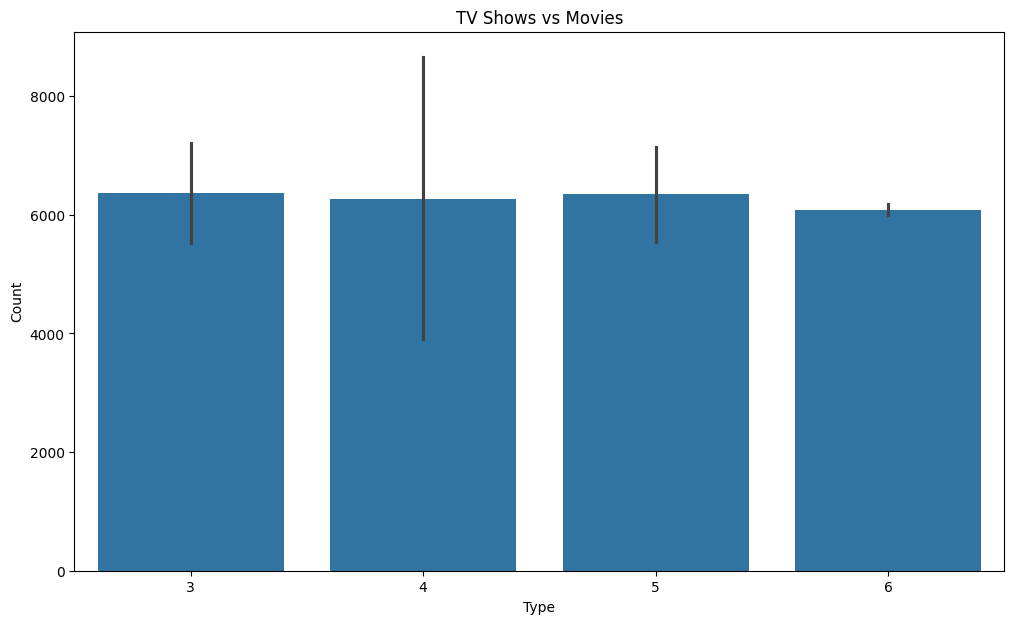

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV Shows vs Movies')
plt.show()


In [ ]:
game_types = training_data['game'].value_counts()
game_types

game
LeagueOfLegends                      2377
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
Overwatch                            2316
Battlefield                          2316
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                          2280
Amazon                               2276
Google                               2274
Fortnite                             2249
AssassinsCreed                       2234
PlayerUnknownsBattlegrounds(PUBG)    2234
Verizon                              2034
Name: count, dtype: int64

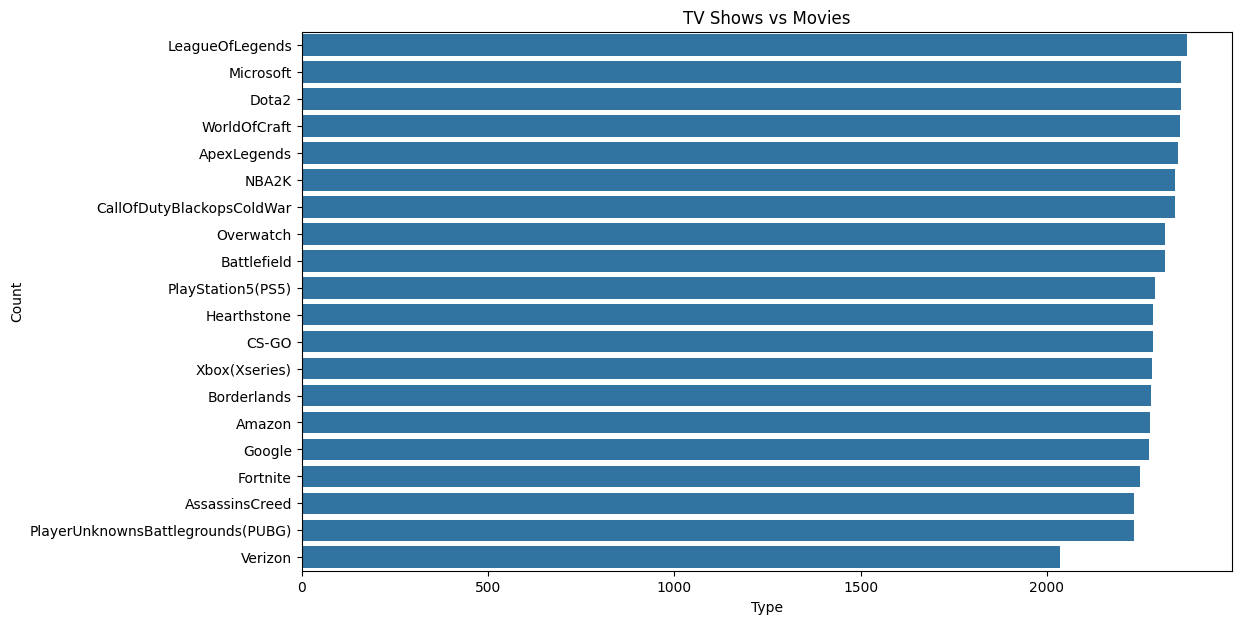

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(y=game_types.index, x=game_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('TV Shows vs Movies')
plt.show()

In [ ]:
sentiment_types = training_data['sentiment'].value_counts()
sentiment_types

sentiment
Positive      13610
Negative      12189
Neutral       11343
Irrelevant     8708
Name: count, dtype: int64

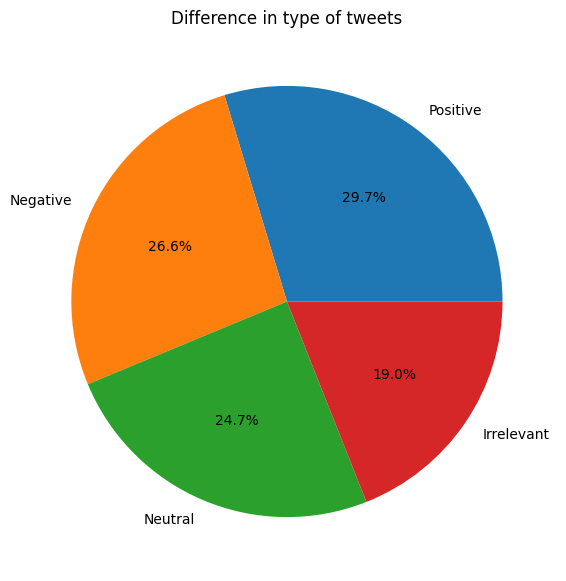

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%1.1f%%') # Use Matplotlib for pie charts
plt.title('Difference in type of tweets')
plt.show()

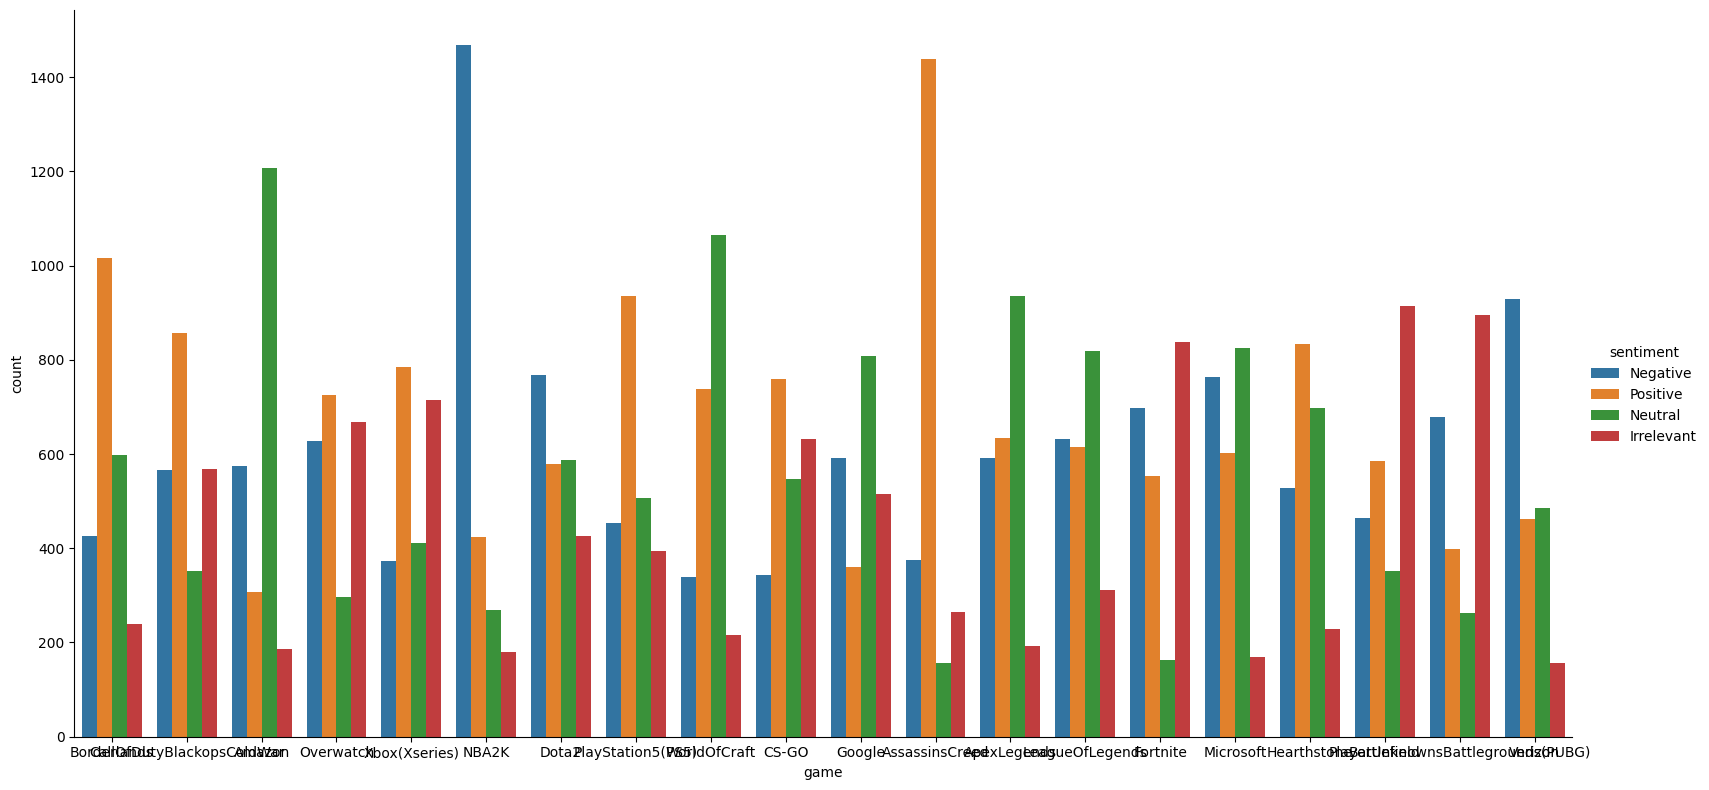

In [ ]:
sns.catplot(x='game',hue='sentiment',data=training_data,kind='count',height=8,aspect=2)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
training_data['sentiment'] = le.fit_transform(training_data['sentiment'])
training_data['game']= le.fit_transform(training_data['game'])
validation_data['sentiment'] = le.fit_transform(validation_data['sentiment'])
validation_data['game']= le.fit_transform(validation_data['game'])

In [ ]:
data = training_data.drop(['id'],axis=1)
data

,game,sentiment,text
24,4,1,the biggest dissappoinment in my life came out...
25,4,1,The biggest disappointment of my life came a y...
26,4,1,The biggest disappointment of my life came a y...
27,4,1,the biggest dissappoinment in my life coming o...
28,4,1,For the biggest male dissappoinment in my life...
...,...,...,...
46243,17,0,Mike McCaul (R - Clear Channel) is not represe...
46244,17,0,Mike McCaul (R-Clear Channel) does not represe...
46245,17,0,Mike McCaul (R - Clear Channel) Do not represe...
46246,17,0,Republican Mike McCaul ( R - TD Clear Channel ...


In [ ]:
data.nunique()

game            20
sentiment        4
text         42998
dtype: int64

In [ ]:
validation_data.nunique()

id           1000
game           32
sentiment       4
text          999
dtype: int64